In [32]:
import pandas as pd
import csv
import os
import seaborn as sns
from scipy.stats import pearsonr
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from scipy.stats import chi2_contingency
import category_encoders as ce

In [33]:
raw_data_path = "Dataset/Raw Data/bank-full.csv"
labeled_data_path = "Dataset/Processed Data/bank-full.csv"
unscaled_target_encoding_data_path = "Dataset/Processed Data/unscaled_target_encoding_data.csv"
unscaled_one_hot_encoding_data_path = "Dataset/Processed Data/unscaled_one_hot_encoding_data.csv"

<h1> Making Labeled CSV file </h1>

In [34]:
fieldnames = ['age',
              'job',
              'marital',
              'education',
              'default',
              'balance',
              'housing',
              'loan',
              'contact',
              'day',
              'month',
              'duration',
              'campaign',
              'pdays',
              'previous',
              'poutcome',
              'y']

In [35]:
def delete_csv(data_path='Dataset/Processed Data/bank-full.csv'):
    if os.path.exists(data_path):
      os.remove(data_path)

In [36]:
def make_list_from_string(str,param):
    list = str.split(param)
    return list

In [37]:
def generate_dictionary_for_csv(fieldnames, feature_list):
    dict = []
    obj = {}
    for i in range(len(fieldnames)):
        obj[fieldnames[i]] = feature_list[i]
    dict.append(obj)
    return dict  

In [38]:
def has_header(data_path):
    try:
        with open(data_path, 'r', encoding='utf-8') as file:
            reader = csv.reader(file)
            header = next(reader)
            return header is not None
    except StopIteration:
        return False

In [39]:
def create_csv(data_path, fieldnames, feature_list, do_delete=False):
    if do_delete:
        delete_csv(data_path)
    with open(data_path, mode='a', encoding="utf-8", newline='') as file:
        writer = csv.DictWriter(file,fieldnames=fieldnames)
        if not has_header(data_path):
            writer.writeheader()
        dict = generate_dictionary_for_csv(fieldnames,feature_list)
        writer.writerows(dict)
        file.close()    

In [40]:
int = 0
with open(raw_data_path, 'r', encoding='utf-8') as read_obj:
    csv_reader = csv.reader(read_obj)
    for row in csv_reader:
        if(int==0):
            int +=1
            continue
        str = row[0]
        str = str.replace('"','')
        feature_list = make_list_from_string(str,";")
        create_csv(labeled_data_path, fieldnames, feature_list, True if int == 1 else False)
        int +=1

<h1> Target Encoding : Converting Categorical values into Continuous values </h1>

<h3> Changing "YES" into 1 & "NO" into 0 </h3>

In [41]:
df = pd.read_csv(labeled_data_path)
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [42]:
def change_col_values(dataframe,key,old_values,new_values):
    for i in range(len(old_values)):
        dataframe[key].replace(old_values[i],new_values[i],inplace=True)
    return dataframe[key]

In [43]:
old_y = ['yes','no']
new_y = [1,0]

old_housing = ['yes','no']
new_housing = [1,0]

old_loan = ['yes','no']
new_loan = [1,0]

old_default = ['yes','no']
new_default = [1,0]

In [44]:
df[fieldnames[16]] = change_col_values(df,fieldnames[16],old_y,new_y)
df[fieldnames[4]] = change_col_values(df,fieldnames[4],old_default,new_default)
df[fieldnames[6]] = change_col_values(df,fieldnames[6],old_housing,new_housing)
df[fieldnames[7]] = change_col_values(df,fieldnames[7],old_loan,new_loan)

<h3> Converting Multiple Classes </h3>

In [45]:
tenc=ce.TargetEncoder() 
cat_ind_list = [1,2,3,8,10,15]
for item in cat_ind_list:
    df[fieldnames[item]] = tenc.fit_transform(df[fieldnames[item]],df['y'])

In [46]:
delete_csv(unscaled_target_encoding_data_path)
df.to_csv(unscaled_target_encoding_data_path,index=None)

In [47]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.000000,33.000000,39.000000,48.000000,95.000000
job,45211.0,0.116985,0.043708,0.072750,0.087903,0.110570,0.137556,0.286780
marital,45211.0,0.116985,0.021189,0.101235,0.101235,0.101235,0.149492,0.149492
education,45211.0,0.116985,0.023365,0.086265,0.105594,0.105594,0.150064,0.150064
default,45211.0,0.018027,0.133049,0.000000,0.000000,0.000000,0.000000,1.000000
balance,45211.0,1362.272058,3044.765829,-8019.000000,72.000000,448.000000,1428.000000,102127.000000
housing,45211.0,0.555838,0.496878,0.000000,0.000000,1.000000,1.000000,1.000000
loan,45211.0,0.160226,0.366820,0.000000,0.000000,0.000000,0.000000,1.000000
contact,45211.0,0.116985,0.048646,0.040707,0.040707,0.149189,0.149189,0.149189
day,45211.0,15.806419,8.322476,1.000000,8.000000,16.000000,21.000000,31.000000


In [48]:
df.nunique()

age            77
job            12
marital         3
education       4
default         2
balance      7168
housing         2
loan            2
contact         3
day            31
month          12
duration     1573
campaign       48
pdays         559
previous       41
poutcome        4
y               2
dtype: int64

In [49]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 17 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   age        45211 non-null  int64  
 1   job        45211 non-null  float64
 2   marital    45211 non-null  float64
 3   education  45211 non-null  float64
 4   default    45211 non-null  int64  
 5   balance    45211 non-null  int64  
 6   housing    45211 non-null  int64  
 7   loan       45211 non-null  int64  
 8   contact    45211 non-null  float64
 9   day        45211 non-null  int64  
 10  month      45211 non-null  float64
 11  duration   45211 non-null  int64  
 12  campaign   45211 non-null  int64  
 13  pdays      45211 non-null  int64  
 14  previous   45211 non-null  int64  
 15  poutcome   45211 non-null  float64
 16  y          45211 non-null  int64  
dtypes: float64(6), int64(11)
memory usage: 5.9 MB


In [50]:
df.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,0.137556,0.101235,0.150064,0,2143,1,0,0.040707,5,0.067195,261,1,-1,0,0.091615,0
1,44,0.110570,0.149492,0.105594,0,29,1,0,0.040707,5,0.067195,151,1,-1,0,0.091615,0
2,33,0.082717,0.101235,0.105594,0,2,1,1,0.040707,5,0.067195,76,1,-1,0,0.091615,0
3,47,0.072750,0.101235,0.135703,0,1506,1,0,0.040707,5,0.067195,92,1,-1,0,0.091615,0
4,33,0.118056,0.149492,0.135703,0,1,0,0,0.040707,5,0.067195,198,1,-1,0,0.091615,0


<h1> One-Hot Encoding : Converting Categorical values into Continuous values </h1>

<h3> Changing "YES" into 1 & "NO" into 0 </h3>

In [51]:
df2 = pd.read_csv(labeled_data_path)
df2.head()

,age,job,marital,education,default,balance,housing,loan,contact,day,month,duration,campaign,pdays,previous,poutcome,y
0,58,management,married,tertiary,no,2143,yes,no,unknown,5,may,261,1,-1,0,unknown,no
1,44,technician,single,secondary,no,29,yes,no,unknown,5,may,151,1,-1,0,unknown,no
2,33,entrepreneur,married,secondary,no,2,yes,yes,unknown,5,may,76,1,-1,0,unknown,no
3,47,blue-collar,married,unknown,no,1506,yes,no,unknown,5,may,92,1,-1,0,unknown,no
4,33,unknown,single,unknown,no,1,no,no,unknown,5,may,198,1,-1,0,unknown,no


In [52]:
df2[fieldnames[16]] = change_col_values(df2,fieldnames[16],old_y,new_y)

<h3> Converting Multiple Classes </h3>

In [53]:
df2 = pd.get_dummies(df2)

In [54]:
delete_csv(unscaled_one_hot_encoding_data_path)
df2.to_csv(unscaled_one_hot_encoding_data_path,index=False)

In [55]:
df2.describe().T

,count,mean,std,min,25%,50%,75%,max
age,45211.0,40.936210,10.618762,18.0,33.0,39.0,48.0,95.0
balance,45211.0,1362.272058,3044.765829,-8019.0,72.0,448.0,1428.0,102127.0
day,45211.0,15.806419,8.322476,1.0,8.0,16.0,21.0,31.0
duration,45211.0,258.163080,257.527812,0.0,103.0,180.0,319.0,4918.0
campaign,45211.0,2.763841,3.098021,1.0,1.0,2.0,3.0,63.0
pdays,45211.0,40.197828,100.128746,-1.0,-1.0,-1.0,-1.0,871.0
previous,45211.0,0.580323,2.303441,0.0,0.0,0.0,0.0,275.0
y,45211.0,0.116985,0.321406,0.0,0.0,0.0,0.0,1.0
job_admin.,45211.0,0.114375,0.318269,0.0,0.0,0.0,0.0,1.0
job_blue-collar,45211.0,0.215257,0.411005,0.0,0.0,0.0,0.0,1.0


In [56]:
df2.nunique()

age                      77
balance                7168
day                      31
duration               1573
campaign                 48
pdays                   559
previous                 41
y                         2
job_admin.                2
job_blue-collar           2
job_entrepreneur          2
job_housemaid             2
job_management            2
job_retired               2
job_self-employed         2
job_services              2
job_student               2
job_technician            2
job_unemployed            2
job_unknown               2
marital_divorced          2
marital_married           2
marital_single            2
education_primary         2
education_secondary       2
education_tertiary        2
education_unknown         2
default_no                2
default_yes               2
housing_no                2
housing_yes               2
loan_no                   2
loan_yes                  2
contact_cellular          2
contact_telephone         2
contact_unknown     

In [57]:
df2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 45211 entries, 0 to 45210
Data columns (total 52 columns):
 #   Column               Non-Null Count  Dtype
---  ------               --------------  -----
 0   age                  45211 non-null  int64
 1   balance              45211 non-null  int64
 2   day                  45211 non-null  int64
 3   duration             45211 non-null  int64
 4   campaign             45211 non-null  int64
 5   pdays                45211 non-null  int64
 6   previous             45211 non-null  int64
 7   y                    45211 non-null  int64
 8   job_admin.           45211 non-null  uint8
 9   job_blue-collar      45211 non-null  uint8
 10  job_entrepreneur     45211 non-null  uint8
 11  job_housemaid        45211 non-null  uint8
 12  job_management       45211 non-null  uint8
 13  job_retired          45211 non-null  uint8
 14  job_self-employed    45211 non-null  uint8
 15  job_services         45211 non-null  uint8
 16  job_student          4

In [58]:
df2.head()

,age,balance,day,duration,campaign,pdays,previous,y,job_admin.,job_blue-collar,...,month_jun,month_mar,month_may,month_nov,month_oct,month_sep,poutcome_failure,poutcome_other,poutcome_success,poutcome_unknown
0,58,2143,5,261,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
1,44,29,5,151,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
2,33,2,5,76,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1
3,47,1506,5,92,1,-1,0,0,0,1,...,0,0,1,0,0,0,0,0,0,1
4,33,1,5,198,1,-1,0,0,0,0,...,0,0,1,0,0,0,0,0,0,1


<h1> Pearson Correlation Testing </h1>

<AxesSubplot: >

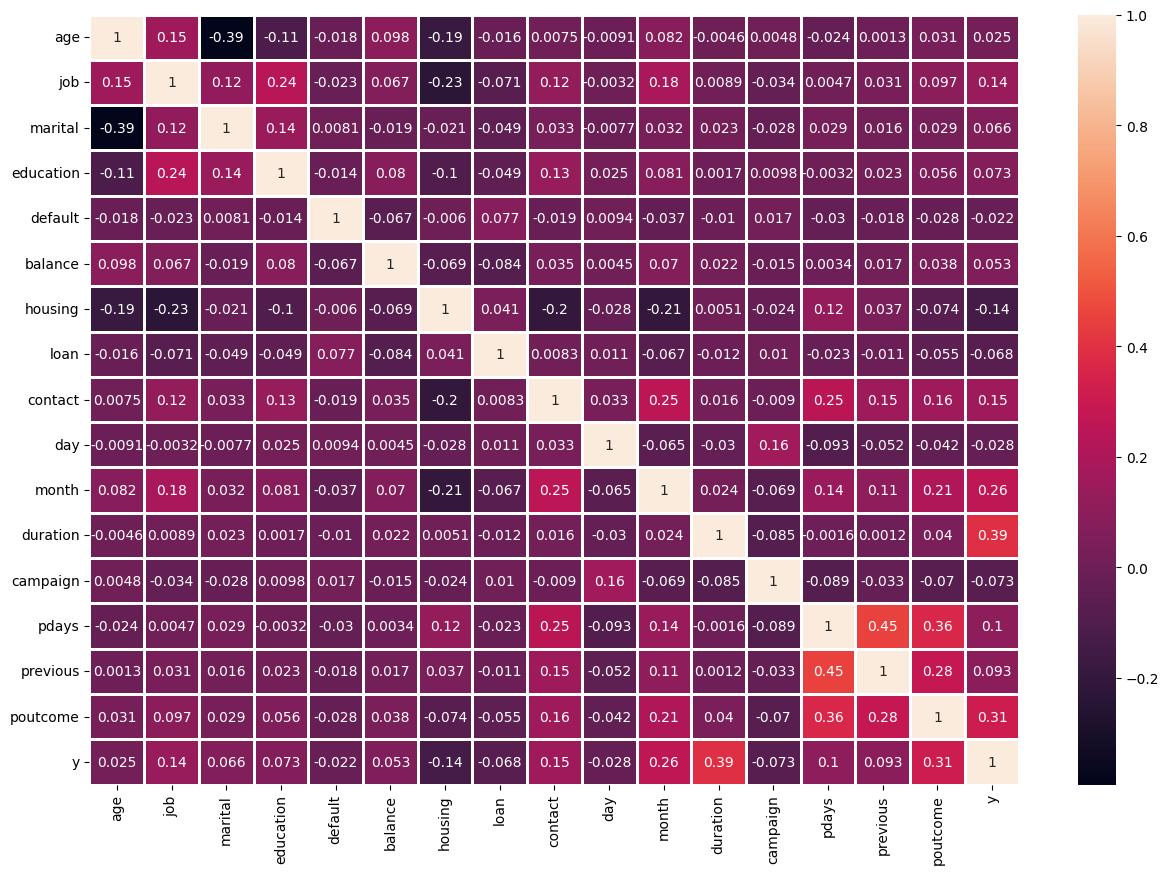

In [59]:
fig, ax = plt.subplots(figsize=(15,10))      
sns.heatmap(df.corr(method='pearson'), annot=True,linewidths=.9, ax=ax)

<h1> Chi-Square P-value Testing Method</h1>

In [60]:
def chi_testing(dataframe, index1, index2):
    fieldname1 = fieldnames[index1]
    fieldname2 = fieldnames[index2]
    dataset_table=pd.crosstab(dataframe[fieldname1],dataframe[fieldname2])
    observed = dataset_table.values
    chi2, pval, dof, expected = chi2_contingency(observed)
    return pval

<h1> P-value</h1>

In [61]:
pval_l1 = []
for j in range(0,len(fieldnames)-1):
    p_val = chi_testing(df,j,16)
    if p_val <= 0.05 :
        pval_l1.append(fieldnames[j])

In [62]:
print("Significant P-value with respect to 'Y' found for the following features:")
for i in range(len(pval_l1)):
    print(i+1,pval_l1[i])

Significant P-value with respect to 'Y' found for the following features:
1 age
2 job
3 marital
4 education
5 default
6 balance
7 housing
8 loan
9 contact
10 day
11 month
12 duration
13 campaign
14 pdays
15 previous
16 poutcome
